# 2 - COMPUTER VISION - Hough Transform and Region Of Interest
    The aim of this program is to implement a basic Hough Transform on an image together with ROI 
    In this case, ROI will be a trapeze

In [102]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image_path = "../../../InputData/Hough_Transform/exit-ramp.jpg"

# Read and gray-scale the image
image = mpimg.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

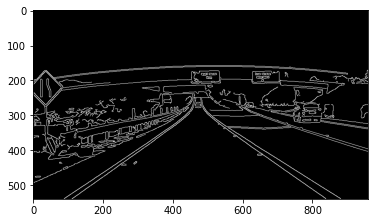

In [101]:
### Canny Edge Detection
kernel_size = 5
blur_gray_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

low_threshold = 50
high_threshold = 150
edges_image = cv2.Canny(blur_gray_image, low_threshold, high_threshold)
plt.imshow(edges_image, cmap='Greys_r')

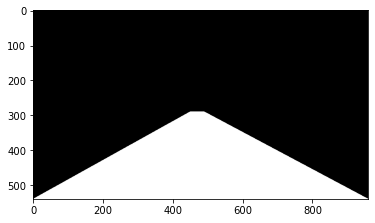

In [114]:
### ROI Masking
mask = np.zeros_like(edges_image)
ignore_mask_color = 255

image_shape = image.shape
bottom_left = (0,image_shape[0])
top_left = (450, 290)
top_right = (490, 290)
bottom_right = (image_shape[1],image_shape[0])

vertices = np.array([[bottom_left, top_left, top_right, bottom_right]],dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
plt.imshow(mask, cmap='Greys_r')
masked_edges = cv2.bitwise_and(edges_image, mask)

# plt.imshow(masked_edges, cmap='Greys_r')

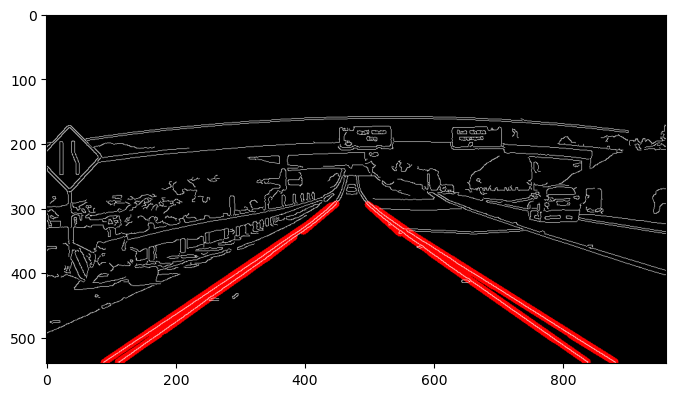

In [112]:
### Hough Transform
rho = 2
theta = np.pi / 180
threshold = 15
min_line_length = 45
max_line_gap = 20

line_image = np.copy(image) * 0 

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

color_edges = np.dstack((edges_image, edges_image, edges_image))

# STEP 6: Draw the lines on the edged image
lines_edges  = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(lines_edges)